In [1]:
import numpy as np
import pandas as pd


import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Sequential
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam


import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier             # for correalation evaluatoin of catagorial data
from sklearn.preprocessing import LabelEncoder                # for encoding categorial data
from sklearn.impute import KNNImputer

from fancyimpute import KNN

from xgboost import XGBClassifier

import csv

import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (5, 5)

In [2]:
df = pd.read_csv("loan.csv")

print(len(df.columns))
print(df.columns)
df.head()

13
Index(['loan_application_id', 'applicant_id', 'Months_loan_taken_for',
       'Purpose', 'Principal_loan_amount',
       'EMI_rate_in_percentage_of_disposable_income', 'Property',
       'Has_coapplicant', 'Has_guarantor', 'Other_EMI_plans',
       'Number_of_existing_loans_at_this_bank', 'Loan_history',
       'high_risk_applicant'],
      dtype='object')


,loan_application_id,applicant_id,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Other_EMI_plans,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
0,d68d975e-edad-11ea-8761-1d6f9c1ff461,1469590,6,electronic equipment,1169000,4,real estate,0,0,NaN,2,critical/pending loans at other banks,0
1,d68d989e-edad-11ea-b1d5-2bcf65006448,1203873,48,electronic equipment,5951000,2,real estate,0,0,NaN,1,existing loans paid back duly till now,1
2,d68d995c-edad-11ea-814a-1b6716782575,1432761,12,education,2096000,2,real estate,0,0,NaN,1,critical/pending loans at other banks,0
3,d68d99fc-edad-11ea-8841-17e8848060ae,1207582,42,FF&E,7882000,2,building society savings agreement/life insurance,0,1,NaN,1,existing loans paid back duly till now,0
4,d68d9a92-edad-11ea-9f3d-1f8682db006a,1674436,24,new vehicle,4870000,3,NaN,0,0,NaN,2,delay in paying off loans in the past,1


In [3]:
df.dropna(subset=['Purpose'], inplace=True)      # removing the 12 rows / entries which had missing data in Purpose column
df = df.drop(['Other_EMI_plans', 'Property'], axis=1)         # Removing "Other_EMI_plans" column (81.4% missing data)

'''
print(len(np.unique(df.Purpose)))
print(np.unique(df.Purpose))
count = pd.Series(df.Purpose).value_counts()
print(count)
'''
df['Purpose'] = df.Purpose.map({'FF&E':1, 'business':2, 'career development':3, 'domestic appliances':4, 'education':5, 'electronic equipment':6, 'new vehicle':7, 'repair costs':8, 'used vehicle':9}) 

'''
count = pd.Series(df.Property).value_counts()
print(count)
'''
#df['Property'] = df.Property.map({'car or other':1, 'real estate':2, 'building society savings agreement/life insurance':3})

'''
count = pd.Series(df.Loan_history).value_counts()
print(count)
'''
df['Loan_history'] = df.Loan_history.map({'existing loans paid back duly till now':3, 'critical/pending loans at other banks':4, 'delay in paying off loans in the past':5, 'all loans at this bank paid back duly':2, 'no loans taken/all loans paid back duly':1})

# think if you can make 'Loan_history' feature ordinal 

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 988 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   loan_application_id                          988 non-null    object
 1   applicant_id                                 988 non-null    int64 
 2   Months_loan_taken_for                        988 non-null    int64 
 3   Purpose                                      988 non-null    int64 
 4   Principal_loan_amount                        988 non-null    int64 
 5   EMI_rate_in_percentage_of_disposable_income  988 non-null    int64 
 6   Has_coapplicant                              988 non-null    int64 
 7   Has_guarantor                                988 non-null    int64 
 8   Number_of_existing_loans_at_this_bank        988 non-null    int64 
 9   Loan_history                                 988 non-null    int64 
 10  high_risk_appl

In [4]:
'''
#pearson_correlation_coef = X.corr()       # Evaluating Correlation between Continuous valued Features with each other and Target Variable

model = ExtraTreesClassifier()

#enc=LabelEncoder()

#Purpose = enc.fit_transform(X['Purpose'])
#X['Purpose']=Purpose

#df.loc['Purpose'] = enc.fit_transform(df.loc['Purpose'])
#df['Loan_history'] = enc.fit_transform(df['Loan_history'])

X = X.iloc[:,2:-1]    
#print(len(X.columns))
print(X.columns)

X = pd.get_dummies(X, columns=['Purpose','Loan_history'], prefix=['Purpose','Loan_history'])   #OneHotFeature Encoding

#print(len(X.columns))
#print(X.columns)

#pearson_correlation_coef = X.corr() 

print(X.info())
model.fit(X,y)
print(model.feature_importances_)
f_imp = pd.Series(model.feature_importances_, index=X.columns)
f_imp.nlargest(10).plot(kind='barh')
plt.show()

#X.head()
#X.iloc[82:85]
#len(y)
#y.head()
'''

"\n#pearson_correlation_coef = X.corr()       # Evaluating Correlation between Continuous valued Features with each other and Target Variable\n\nmodel = ExtraTreesClassifier()\n\n#enc=LabelEncoder()\n\n#Purpose = enc.fit_transform(X['Purpose'])\n#X['Purpose']=Purpose\n\n#df.loc['Purpose'] = enc.fit_transform(df.loc['Purpose'])\n#df['Loan_history'] = enc.fit_transform(df['Loan_history'])\n\nX = X.iloc[:,2:-1]    \n#print(len(X.columns))\nprint(X.columns)\n\nX = pd.get_dummies(X, columns=['Purpose','Loan_history'], prefix=['Purpose','Loan_history'])   #OneHotFeature Encoding\n\n#print(len(X.columns))\n#print(X.columns)\n\n#pearson_correlation_coef = X.corr() \n\nprint(X.info())\nmodel.fit(X,y)\nprint(model.feature_importances_)\nf_imp = pd.Series(model.feature_importances_, index=X.columns)\nf_imp.nlargest(10).plot(kind='barh')\nplt.show()\n\n#X.head()\n#X.iloc[82:85]\n#len(y)\n#y.head()\n"

In [5]:
pearson_correlation_coef = df.corr()       # Evaluating Correlation btw Continuous valued Features (with each other & Target Var)

def feture_importance_categorical(input_var, output_var, index_column):
    model = ExtraTreesClassifier()
    model.fit(input_var,output_var)
    print(model.feature_importances_)
    f_imp = pd.Series(model.feature_importances_, index=index_column)
    f_imp.nlargest(10).plot(kind='barh')
    plt.show()
    return 0

In [6]:
y = df.iloc[:,-1]           # Target Variable Initialization
X = df.iloc[:,2:-1]         # Training Variable Initialization

def fill_missing_values(df_name):
    imputer = KNNImputer(n_neighbors=1)
    df_name = imputer.fit_transform(df_name)
    return df_name

X_columns = X.columns

X.isnull().sum()

Months_loan_taken_for                          0
Purpose                                        0
Principal_loan_amount                          0
EMI_rate_in_percentage_of_disposable_income    0
Has_coapplicant                                0
Has_guarantor                                  0
Number_of_existing_loans_at_this_bank          0
Loan_history                                   0
dtype: int64

In [7]:
imputer = KNN()

#X = pd.DataFrame(np.round(imputer.fit_transform(X)),columns = X_columns)

print(X.info())

X.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 988 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                                       Non-Null Count  Dtype
---  ------                                       --------------  -----
 0   Months_loan_taken_for                        988 non-null    int64
 1   Purpose                                      988 non-null    int64
 2   Principal_loan_amount                        988 non-null    int64
 3   EMI_rate_in_percentage_of_disposable_income  988 non-null    int64
 4   Has_coapplicant                              988 non-null    int64
 5   Has_guarantor                                988 non-null    int64
 6   Number_of_existing_loans_at_this_bank        988 non-null    int64
 7   Loan_history                                 988 non-null    int64
dtypes: int64(8)
memory usage: 69.5 KB
None


,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,Loan_history
0,6,6,1169000,4,0,0,2,4
1,48,6,5951000,2,0,0,1,3
2,12,5,2096000,2,0,0,1,4
3,42,1,7882000,2,0,1,1,3
4,24,7,4870000,3,0,0,2,5


In [8]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15, random_state=1)      # splitting for training data

#X_cv, X_test, y_cv, y_test = train_test_split(X_test,y_test,test_size=0.5, random_state=1)  # splitting for Dev and Test sets

[0.20443126 0.14236701 0.40258459 0.06578422 0.01111672 0.0119957
 0.05377625 0.10794425]


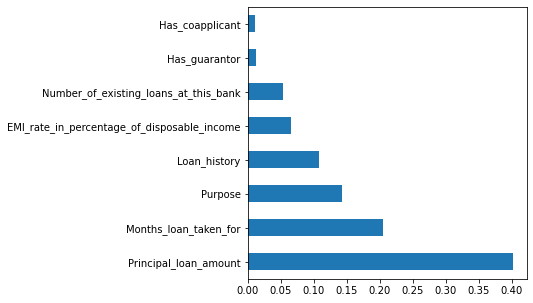

,applicant_id,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
applicant_id,1.000000,0.011016,-0.050177,-0.045096,-0.001914,0.000617,0.009202,-0.039620,-0.009843,-0.025889
Months_loan_taken_for,0.011016,1.000000,0.009322,0.623414,0.082960,0.023076,-0.039037,-0.008414,-0.002727,0.213325
Purpose,-0.050177,0.009322,1.000000,0.066873,0.013467,-0.046131,0.039374,0.032281,0.059039,-0.052130
Principal_loan_amount,-0.045096,0.623414,0.066873,1.000000,-0.264803,0.027754,-0.061272,0.018994,0.002031,0.143898
EMI_rate_in_percentage_of_disposable_income,-0.001914,0.082960,0.013467,-0.264803,1.000000,-0.005422,-0.011492,0.022415,0.029446,0.076779
Has_coapplicant,0.000617,0.023076,-0.046131,0.027754,-0.005422,1.000000,-0.046018,-0.018600,-0.016341,0.057691
Has_guarantor,0.009202,-0.039037,0.039374,-0.061272,-0.011492,-0.046018,1.000000,-0.021359,-0.066330,-0.052256
Number_of_existing_loans_at_this_bank,-0.039620,-0.008414,0.032281,0.018994,0.022415,-0.018600,-0.021359,1.000000,0.332205,-0.048705
Loan_history,-0.009843,-0.002727,0.059039,0.002031,0.029446,-0.016341,-0.066330,0.332205,1.000000,-0.180122
high_risk_applicant,-0.025889,0.213325,-0.052130,0.143898,0.076779,0.057691,-0.052256,-0.048705,-0.180122,1.000000


In [9]:
feture_importance_categorical(X, y, X_columns)

pearson_correlation_coef

In [10]:
X.shape

(988, 8)

In [11]:
# Neural Networks Implementation

#analysis = []
'''
for i in [2, 4, 8, 16, 32, 64, 128]:
    for j in [0, 2, 4, 8, 16, 32]:
        
        model_NN = Sequential([Dense(units = i, activation='relu', name = 'layer_1', input_dim = 20, kernel_regularizer=tf.keras.regularizers.l1_l2(
            l1=0.0, l2=0.00)),
                               Dense(units = j, activation='relu', name = 'layer_2', kernel_regularizer=tf.keras.regularizers.l1_l2(
            l1=0.0, l2=0.00)),
                               Dense(units = 1, activation='sigmoid', name = 'layer_3'),
                              ])

        model_NN.compile(loss=BinaryCrossentropy(), 
                         optimizer = Adam(learning_rate = 0.01),
                        metrics=tf.keras.metrics.BinaryAccuracy())

        model_NN.fit(X_norm_train,y_train, epochs=100, verbose=0)

        score = model_NN.evaluate(X_norm_cv, y_cv, verbose=1)
        
        analysis.append([i,j,score])

'''        
'''
        y_predict_NN = model_NN.predict(X_norm_test)
        y_predict_NN[y_predict_NN >= 0.5] = 1
        y_predict_NN[y_predict_NN < 0.5] = 0

        acc_NN = sklearn.metrics.accuracy_score(y_predict_NN,y_test)
'''

#print(analysis)

'\n        y_predict_NN = model_NN.predict(X_norm_test)\n        y_predict_NN[y_predict_NN >= 0.5] = 1\n        y_predict_NN[y_predict_NN < 0.5] = 0\n\n        acc_NN = sklearn.metrics.accuracy_score(y_predict_NN,y_test)\n'

In [12]:
# Neural Networks Implementation

model_NN = Sequential([Dense(units = 32, activation='relu', name = 'layer_1', input_dim = 8, kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.0, l2=0.01)),
                       Dense(units = 64, activation='relu', name = 'layer_2', kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.0, l2=0.01)),
                       Dense(units = 16, activation='relu', name = 'layer_3', kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.0, l2=0.01)),
                       Dense(units = 1, activation='sigmoid', name = 'layer_4'),
                      ])

model_NN.compile(loss=BinaryCrossentropy(),
                 optimizer = Adam(learning_rate = 0.0001),
                metrics=tf.keras.metrics.BinaryAccuracy())

model_NN.fit(X_train,y_train, epochs=1000)

score = model_NN.evaluate(X_test, y_test, verbose=1)


Epoch 1/1000
27/27 [==============================] - 1s 1ms/step - loss: 1.4685 - binary_accuracy: 0.6961
Epoch 2/1000
27/27 [==============================] - 0s 1ms/step - loss: 1.4457 - binary_accuracy: 0.6961
Epoch 3/1000
27/27 [==============================] - 0s 1ms/step - loss: 1.4236 - binary_accuracy: 0.6961
Epoch 4/1000
27/27 [==============================] - 0s 1ms/step - loss: 1.4031 - binary_accuracy: 0.6961
Epoch 5/1000
27/27 [==============================] - 0s 1ms/step - loss: 1.3821 - binary_accuracy: 0.6961
Epoch 6/1000
27/27 [==============================] - 0s 1ms/step - loss: 1.3625 - binary_accuracy: 0.6961
Epoch 7/1000
27/27 [==============================] - 0s 2ms/step - loss: 1.3435 - binary_accuracy: 0.6961
Epoch 8/1000
27/27 [==============================] - 0s 1ms/step - loss: 1.3252 - binary_accuracy: 0.6961
Epoch 9/1000
27/27 [==============================] - 0s 1ms/step - loss: 1.3078 - binary_accuracy: 0.6961
Epoch 10/1000
27/27 [================

In [13]:
X.info()

AttributeError: 'numpy.ndarray' object has no attribute 'info'

In [14]:
# XGBoost Decision tree....Although Normalized data is not required for XGBoost but anyways Normalization doesn't ever hurts
model_DT = XGBClassifier()
model_DT.fit(X_train,y_train)
y_predict_DT = model_DT.predict(X_test)
acc_DT = sklearn.metrics.accuracy_score(y_predict_DT,y_test)
print(acc_DT)

0.6912751677852349


In [15]:
# Random Forest Implementation
model_RFC = RandomForestClassifier()
model_RFC.fit(X_train,y_train)
y_predict_RFC = model_RFC.predict(X_test)
acc_RFC = sklearn.metrics.accuracy_score(y_predict_RFC,y_test)
print(acc_RFC)

0.6778523489932886


In [16]:
# Logistic Regression / Classification - sklearn
model_classification = LogisticRegression()
model_classification.fit(X_train,y_train)
y_predict_classification = model_classification.predict(X_test)
acc_classification = sklearn.metrics.accuracy_score(y_predict_classification,y_test)
print(acc_classification)

0.7248322147651006
